In this notebook I used Python to explore the data and gain a better understanding about the features and target variable as well as modelling for Loan granted use case.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

#import time, datetime
from datetime import datetime, date
import seaborn as sns

#from scipy.stats import poisson, chi2_contingency
#from tqdm.notebook import tqdm


#import statsmodels.api as sm



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
PATH= "C:\\Users\\masud.pervez\\Documents\\SEB_project\\seb_project/"

In [3]:
# Load data
customer_df = pd.read_csv(f'{PATH}data//Customer.csv', sep=',')
district_df = pd.read_csv(f'{PATH}data//District.csv', sep=',')
transaction_df = pd.read_csv(f'{PATH}data//Transaction.csv', sep=',')
customer_df.head()

,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,ACTIVE,LOAN,DISTRICT_ID,SET_SPLIT
0,1,1,F,19701213,1,0,18,TRAIN
1,2,2,M,19450204,1,1,1,TRAIN
2,4,3,M,19561201,1,0,5,TEST
3,6,4,M,19190922,1,0,12,TRAIN
4,7,5,M,19290125,1,0,15,TRAIN


In [4]:
transaction_df.sample(5)

,TRANS_ID,ACCOUNT_ID,DATE,AMOUNT,BALANCE,TYPE,OPERATION
646855,960848,3273,19970919,17253.0,53211.1,WITHDRAWAL,WITHDRAWAL_IN_CASH
878344,77621,258,19980604,2100.0,27988.4,WITHDRAWAL,WITHDRAWAL_IN_CASH
119548,845825,2880,19941231,14.6,45148.3,WITHDRAWAL,WITHDRAWAL_IN_CASH
26418,632616,2161,19931230,700.0,700.0,CREDIT,CREDIT_IN_CASH
671081,112445,379,19971021,300.0,15907.4,WITHDRAWAL,WITHDRAWAL_IN_CASH


In [5]:
district_df.sample(5)

,DISTRICT_ID,N_INHAB,N_CITIES,URBAN_RATIO,AVG_SALARY,UNEMP_95,UNEMP_96,N_ENTR,CRIME_95,CRIME_96
53,54,387570,1,100.0,9897,1.60,1.96,140,18721,18696
16,17,74062,7,61.4,8114,2.38,2.62,119,1003,1181
13,14,177686,9,74.8,10045,1.42,1.71,135,6604,6295
60,61,117897,6,53.8,8814,4.76,5.74,107,2112,2059
69,70,285387,7,89.9,10177,6.63,7.75,81,9878,10108


In [6]:
# Change date type from int to datetime
# # Create Timestamp object
customer_df['BIRTH_DT'] = pd.to_datetime(customer_df.BIRTH_DT, format= "%Y%m%d")
transaction_df['DATE'] = pd.to_datetime(transaction_df.DATE, format= "%Y%m%d")


# Exploratory Data Analysis (EDA)

In [7]:
# Total no of customers

print('Total no of customers: {}'.format(customer_df['CLIENT_ID'].nunique()))
print('Total no of Transactions: {}'.format(transaction_df['TRANS_ID'].nunique()))
print('Duration of Transactions: {} to {}'.format(min(transaction_df['DATE']).date(), max(transaction_df['DATE']).date()))
print('Total no of Districts: {}'.format(district_df.shape[0]))

Total no of customers: 4500
Total no of Transactions: 1056320
Duration of Transactions: 1993-01-01 to 1998-12-31
Total no of Districts: 77


### Question: How many transactions did an average customer complete in the period? How much did they spend? Does it change over time?

In [18]:
transaction_df.groupby('ACCOUNT_ID')['TRANS_ID'].count().mean()

234.73777777777778

In [8]:
print("No of transactions: {:.0f}" .format(transaction_df.shape[0]/transaction_df.ACCOUNT_ID.nunique()))
print("Average amount paid: {:.2f}".format(transaction_df.AMOUNT.mean()))

No of transactions: 235
Average amount paid: 5924.15


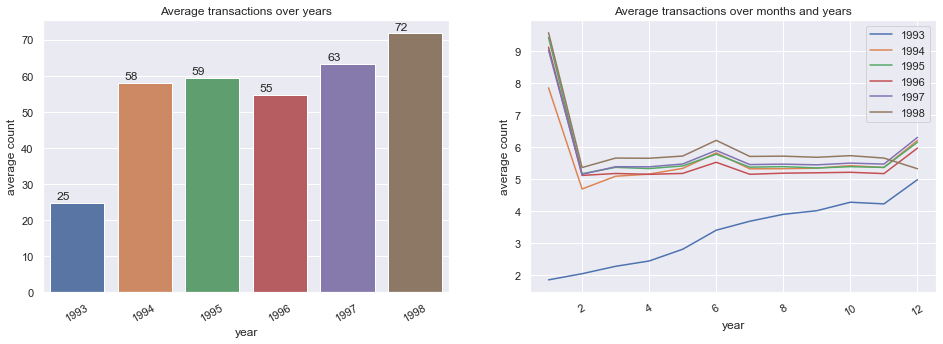

In [9]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
trans_year= transaction_df.groupby(transaction_df['DATE'].dt.year).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_year, x=trans_year.index, ax= ax1)
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("year")
ax1.set_ylabel("average count")
ax1.set_title("Average transactions over years", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

trans_yearMonth= transaction_df.groupby([transaction_df['DATE'].dt.month, transaction_df['DATE'].dt.year]).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
trans_yearMonth.unstack().plot(kind='line', ax= ax2)
plt.xticks(rotation=30, horizontalalignment="center")
ax2.set_title("Average transactions over months and years")
ax2.set_xlabel("year")
ax2.set_ylabel("average count")
ax2.legend(loc= 'best')
plt.savefig(f'{PATH}/results/plots/avg_transaction.png')
plt.show()



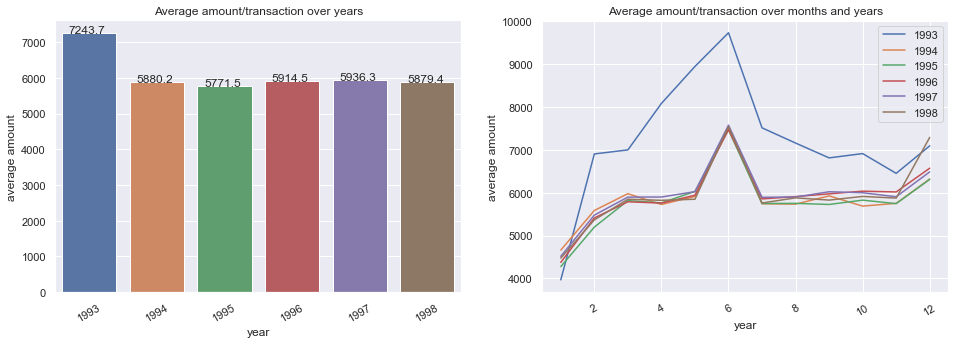

In [10]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
trans_year= transaction_df.groupby(transaction_df['DATE'].dt.year).apply(lambda x: x['AMOUNT'].mean())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_year, x=trans_year.index, ax= ax1)
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("year")
ax1.set_ylabel("average amount")
ax1.set_title("Average amount/transaction over years", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

trans_yearMonth= transaction_df.groupby([transaction_df['DATE'].dt.month, transaction_df['DATE'].dt.year]).apply(lambda x: x['AMOUNT'].mean())
trans_yearMonth.unstack().plot(kind='line', ax= ax2)
plt.xticks(rotation=30, horizontalalignment="center")
ax2.set_title("Average amount/transaction over months and years")
ax2.set_xlabel("year")
ax2.set_ylabel("average amount")
ax2.legend(loc= 'best')
plt.savefig(f'{PATH}/results/plots/avg_transaction_year.png')
plt.show()


In [11]:
customer_transaction_df= pd.merge(customer_df, transaction_df, how= 'inner', on= 'ACCOUNT_ID')
customer_transaction_df.sample(5)
print(customer_transaction_df.shape)

(1056320, 14)


In [12]:
total_transactionByCustomer= customer_transaction_df.groupby('CLIENT_ID').agg({
    'TRANS_ID': 'count',
    'AMOUNT': sum
}).reset_index()

total_transactionByCustomer

,CLIENT_ID,TRANS_ID,AMOUNT
0,1,239,375174.5
1,2,478,3151479.3
2,4,117,295021.8
3,6,186,350971.4
4,7,84,166881.4
...,...,...,...
4495,13931,368,3295795.5
4496,13955,304,3957372.2
4497,13968,378,2948081.4
4498,13971,344,1330010.5


### Distrubution of transactions by customers

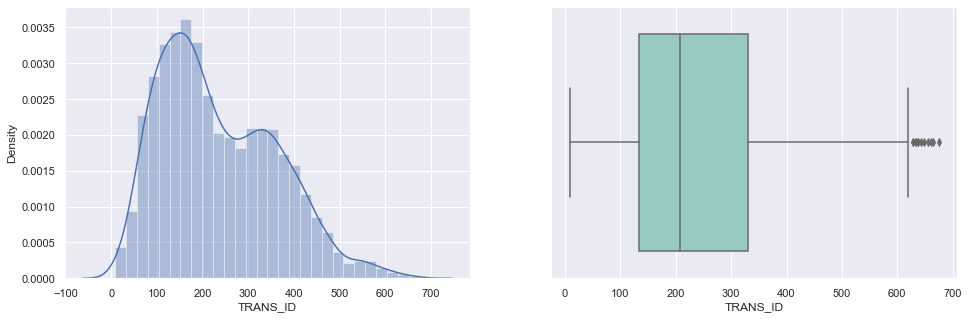

In [20]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))
#x='Sålt', kind="kde", hue= 'group
sns.distplot(total_transactionByCustomer["TRANS_ID"],ax= ax1)
#ax1.vlines(trans_district.mean(), ymin= 0, ymax= 0.0037, color= 'r', linestyles= 'dashed')

sns.boxplot("TRANS_ID", data=total_transactionByCustomer, ax= ax2, palette="Set3")
plt.savefig(f'{PATH}/results/plots/transaction_dist.png')
plt.show()

In [ ]:
transaction_by_year= transaction_df.groupby(transaction_df['DATE'].dt.year).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())\
                        .reset_index() \
                        .rename(columns= {0: 'average_transactions'})

transaction_by_year

sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
sns.barplot(x='DATE', y= 'CLIENT_ID', 
              data= customer_transaction_df.groupby(customer_transaction_df.DATE.dt.year).agg({'CLIENT_ID':'nunique'}).reset_index(), 
              ax= ax1)
ax1.set_xlabel("year")
ax1.set_ylabel("Count")
ax1.set_title("Distribution of number of customers over years")

# 2nd plot
sns.lineplot(x= 'DATE', y= 'average_transactions', data= transaction_by_year, ax= ax2)
ax2.set_xlabel("year")
ax2.set_ylabel("#transactions")
ax2.set_title("Distribution of number of transactions over years")

plt.savefig(f'{PATH}/results/plots/avg_transaction_period.png')
plt.show()

### Question: Do different customer profiles show different behavior? Is the transaction pattern homogeneous across geographic regions?


In [22]:
merge_df= customer_transaction_df.merge(district_df, how = 'inner', on="DISTRICT_ID")

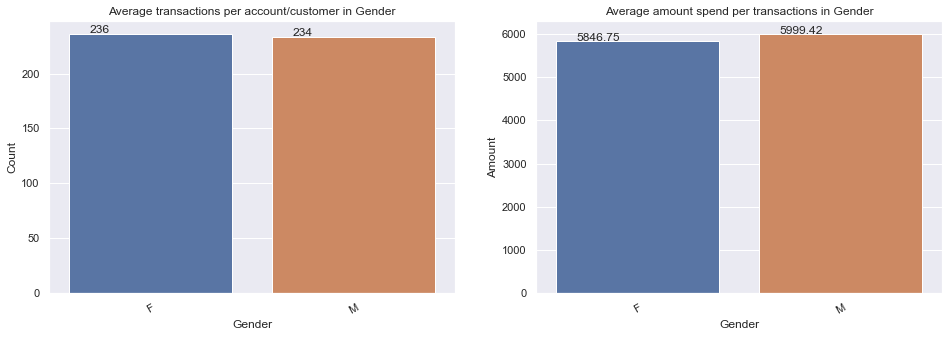

In [23]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
trans_gender= merge_df.groupby(merge_df['GENDER']).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_gender, x=trans_gender.index, ax= ax1)
ax1.tick_params(axis='x', rotation=30)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Count")
ax1.set_title("Average transactions per account/customer in Gender", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

amount_gender= merge_df.groupby(merge_df['GENDER']).apply(lambda x: x['AMOUNT'].mean())
#amount_gender.plot(kind='barh', ax= ax2)
sns.barplot(y= amount_gender, x= amount_gender.index, ax=ax2)
plt.xticks(rotation=30, horizontalalignment="center")
ax2.set_title("Average amount spend per transactions in Gender" , fontsize=12)
ax2.set_xlabel("Gender")
ax2.set_ylabel("Amount")
for p in ax2.patches:
        ax2.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))

plt.savefig(f'{PATH}/results/plots/transaction_gender.png')
plt.show()


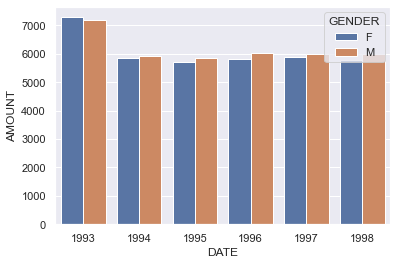

In [24]:
data= merge_df.groupby([merge_df.DATE.dt.year, 'GENDER']).agg({'AMOUNT':'mean'}).reset_index()
sns.barplot(x='DATE', y= 'AMOUNT', hue= 'GENDER',data= data)

plt.show()

Customer profile shows almost 50-50 ratio on total transaction in their Gender category over years. So customer profile interms of gender doesn't show any significant difference in theri transaction behaviour over the period.

### Distribution of transactions over districts

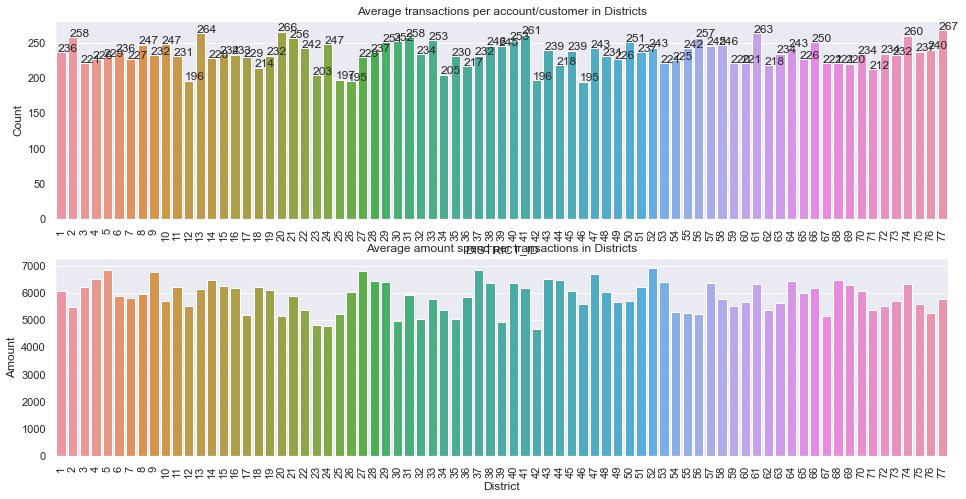

In [25]:
sns.set(style="darkgrid")
fig, ((ax1, ax2)) = plt.subplots(nrows = 2, ncols = 1,figsize=(16,8))

# 1st plot
trans_district= merge_df.groupby(merge_df['DISTRICT_ID']).apply(lambda x: x['TRANS_ID'].count()/x['ACCOUNT_ID'].nunique())
#trans_year.plot(kind='bar', ax= ax1)
sns.barplot(y=trans_district, x=trans_district.index, ax= ax1)
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel("Count")
ax1.set_title("Average transactions per account/customer in Districts", fontsize=12)
for p in ax1.patches:
        ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))


# 2nd plot

amount_district= merge_df.groupby(merge_df['DISTRICT_ID']).apply(lambda x: x['AMOUNT'].mean())
#amount_gender.plot(kind='barh', ax= ax2)
sns.barplot(y= amount_district, x= amount_district.index, ax=ax2)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Average amount spend per transactions in Districts" , fontsize=12)
ax2.set_xlabel("District")
ax2.set_ylabel("Amount")
plt.savefig(f'{PATH}/results/plots/transaction_district.png')
plt.show()


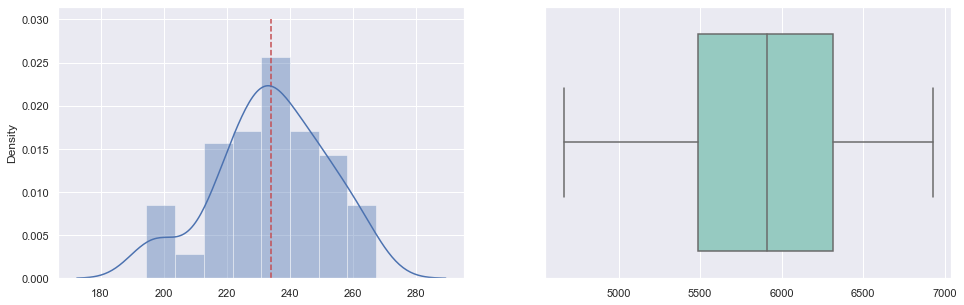

In [26]:
fig, ((ax1, ax2)) = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))
#x='Sålt', kind="kde", hue= 'group
sns.distplot(trans_district,ax= ax1, kde=True)
ax1.vlines(trans_district.mean(), ymin= 0, ymax= 0.030, color= 'r', linestyles= 'dashed')

sns.boxplot(amount_district, ax= ax2, palette="Set3")
plt.show()

In [27]:
trans_district.describe()

count     77.000000
mean     234.214801
std       17.545687
min      194.548387
25%      224.819549
50%      233.595890
75%      246.371429
max      267.465116
dtype: float64

<Figure size 1152x576 with 0 Axes>

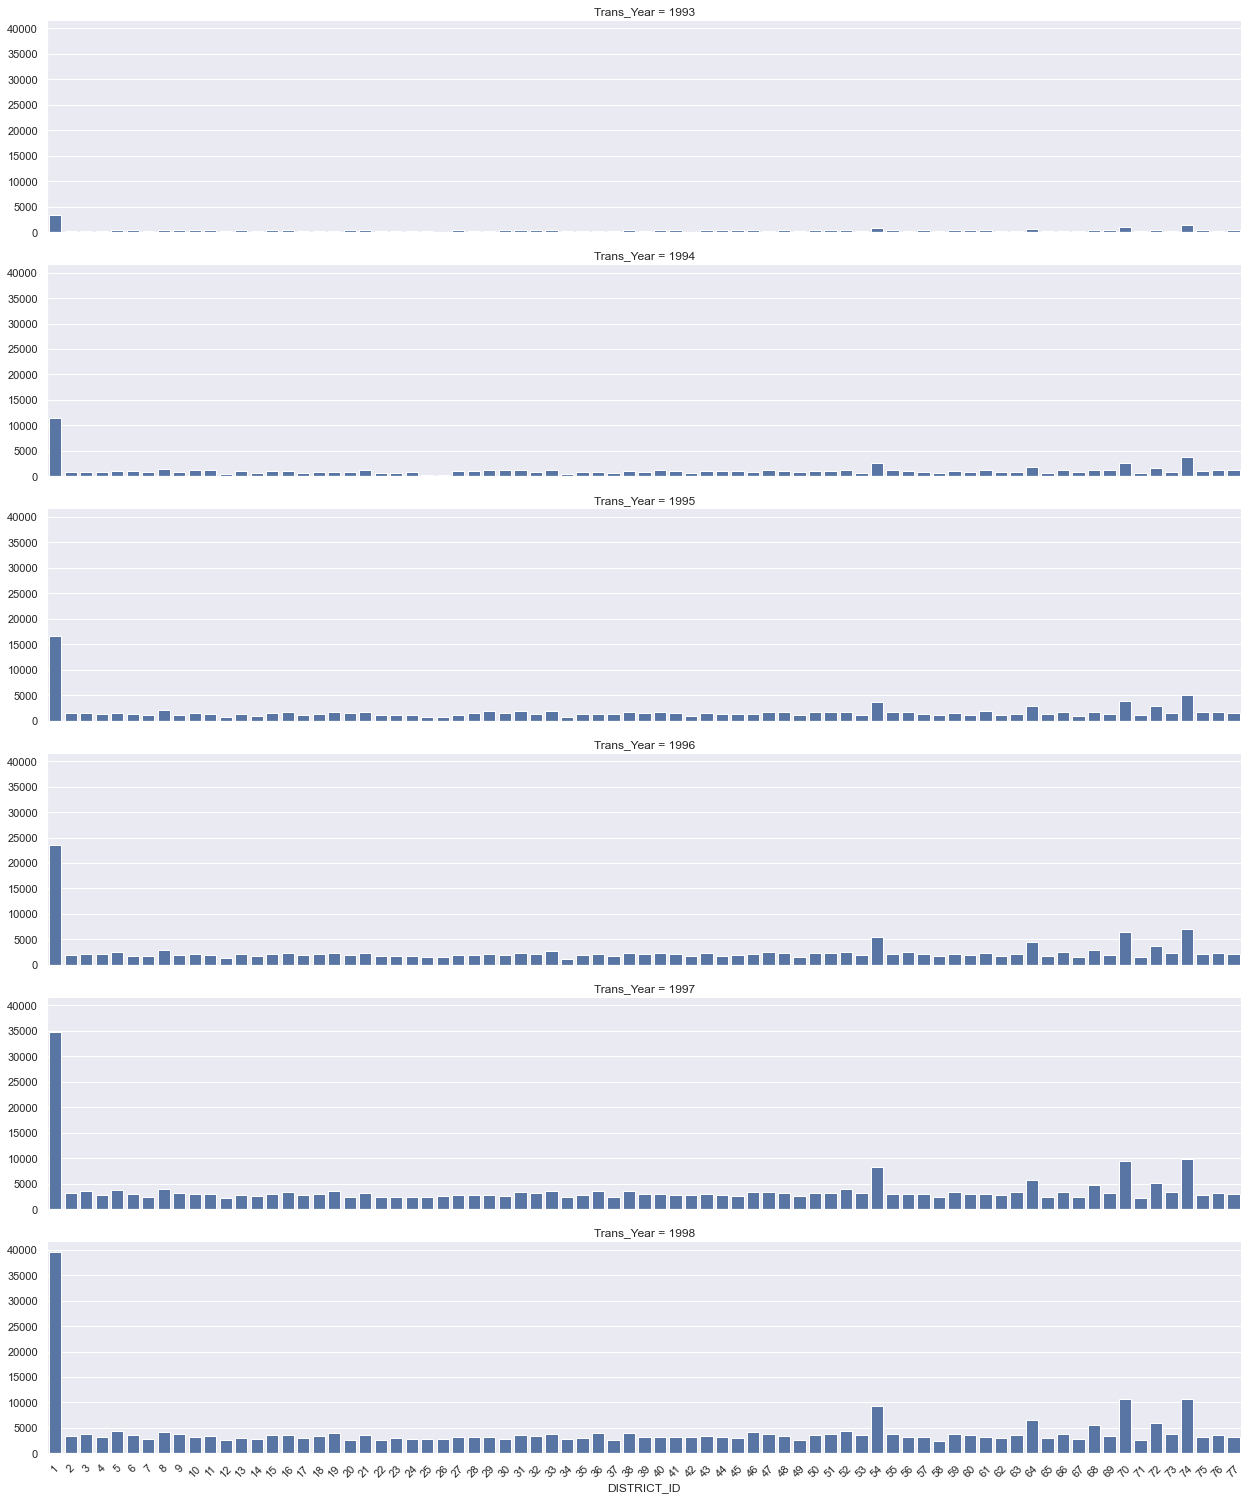

In [28]:
plt.figure(figsize=(16,8))
merge_df['Trans_Year']= merge_df.DATE.dt.year
g = sns.FacetGrid(merge_df,  row='Trans_Year', height=3.5, aspect=5) # aspect * height gives the width of each facet in inches
plt.xticks(rotation= 45)
g.map(sns.countplot, "DISTRICT_ID")
plt.show()

# (B) Predictive model

# Data Pre-processing

### Feature Engineering

In [33]:
def calculateAge(dob):
    '''This function will calculae age given a string/int dob.'''
    today= date.today() 
    dob= pd.to_datetime(dob, format= "%Y%m%d").date()
    #dob = datetime.strptime(str(dob), "%Y%m%d").date() # convert int to str first
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

age= customer_df['BIRTH_DT'].apply(calculateAge)
# Add into customer df
customer_df.insert(4, 'Age', age, True)

In [34]:
# Aggregate transaction dataset for merging

transaction_aggdf= transaction_df.groupby('ACCOUNT_ID').agg(
                                                max_date=('DATE', max),
                                                min_date=('DATE', min),
                                                unique_dates= ('DATE' , "nunique"),
                                                num_days=(
                                                    "DATE", 
                                                    lambda x: (max(x) - min(x)).days),
                                                trans_amount= ('AMOUNT', 'mean'),
                                                avg_balance= ('BALANCE', 'mean'),
                                                type_most= ('TYPE', lambda x: x.value_counts().index[0]),
                                                operation_most= ('OPERATION', lambda x: x.value_counts().index[0])
                                                #type_most= ('TYPE', pd.Series.mode),
                                                #operation_most= ('OPERATION', pd.Series.mode)
                                                ). reset_index()

In [35]:
# grouped = transaction_df.loc[transaction_df['ACCOUNT_ID']== 925].groupby('ACCOUNT_ID', as_index=False).agg({
#     "DATE": [min, max, "nunique", lambda x: (max(x) - min(x)).days],
    
    
# }) 
# # Using ravel, and a string join, we can create better names for the columns:
# grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
# grouped

In [36]:
model_df = (pd.merge(customer_df, district_df, how = 'left', on = "DISTRICT_ID")\
            .merge(transaction_aggdf , how ='left', on = 'ACCOUNT_ID')
           )
model_df.sample(5)

,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,Age,ACTIVE,LOAN,DISTRICT_ID,SET_SPLIT,N_INHAB,...,CRIME_95,CRIME_96,max_date,min_date,unique_dates,num_days,trans_amount,avg_balance,type_most,operation_most
1233,1571,1298,F,1967-10-15,53,1,0,7,TRAIN,94725,...,4289,4846,1998-12-31,1996-01-20,160,1076,4696.342714,28960.260804,WITHDRAWAL,WITHDRAWAL_IN_CASH
1421,1816,1498,M,1951-07-24,69,1,1,62,TRAIN,145688,...,2719,2906,1998-12-31,1997-02-07,87,692,9533.125000,46121.087879,CREDIT,WITHDRAWAL_IN_CASH
2334,2965,2455,F,1918-02-07,103,1,0,30,TRAIN,94812,...,2985,2804,1998-12-31,1997-02-06,84,693,2503.075962,27375.762500,WITHDRAWAL,WITHDRAWAL_IN_CASH
3595,4565,3786,M,1948-03-03,73,1,0,14,TRAIN,177686,...,6604,6295,1998-12-31,1993-06-22,315,2018,13970.528302,47682.476179,WITHDRAWAL,WITHDRAWAL_IN_CASH
3125,3977,3286,M,1975-09-27,45,1,0,8,TEST,112065,...,5179,4987,1998-12-31,1996-02-26,175,1039,12342.900862,55449.414655,WITHDRAWAL,WITHDRAWAL_IN_CASH


In [37]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CLIENT_ID       4500 non-null   int64         
 1   ACCOUNT_ID      4500 non-null   int64         
 2   GENDER          4500 non-null   object        
 3   BIRTH_DT        4500 non-null   datetime64[ns]
 4   Age             4500 non-null   int64         
 5   ACTIVE          4500 non-null   int64         
 6   LOAN            4500 non-null   int64         
 7   DISTRICT_ID     4500 non-null   int64         
 8   SET_SPLIT       4500 non-null   object        
 9   N_INHAB         4500 non-null   int64         
 10  N_CITIES        4500 non-null   int64         
 11  URBAN_RATIO     4500 non-null   float64       
 12  AVG_SALARY      4500 non-null   int64         
 13  UNEMP_95        4500 non-null   object        
 14  UNEMP_96        4500 non-null   float64       
 15  N_EN

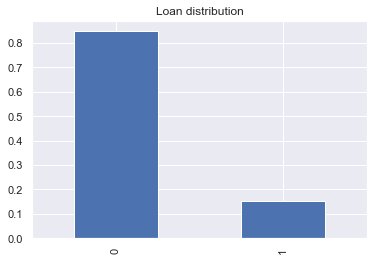

In [38]:
# plot bar chart
model_df['LOAN'].value_counts(normalize=True).plot.bar(title= 'Loan distribution')
plt.show()

GENDER     F     M
LOAN              
0       1860  1958
1        348   334


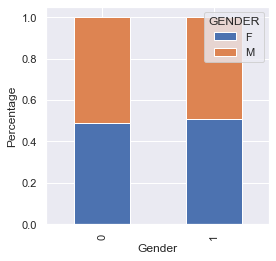

In [39]:
print(pd.crosstab(model_df['LOAN'], model_df['GENDER']))

Gender= pd.crosstab(model_df['LOAN'], model_df['GENDER'])
Gender.div(Gender.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

In [68]:
# Analyze applicant age

# making bins for Coapplicant income variable
bins = [35,50,70, 80, 110]
group = ['35-50','51-70','71-80','80+']
Age_bin = pd.cut(model_df['Age'],bins,labels=group)
model_df.insert(5, 'Age_bin', Age_bin, True)
model_df.Age_bin.value_counts()

51-70    1626
35-50    1027
80+      1007
71-80     840
Name: Age_bin, dtype: int64

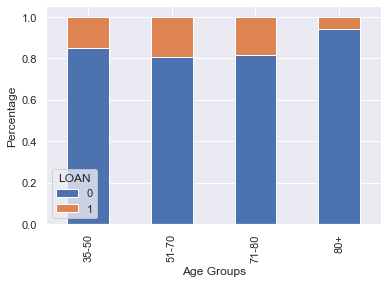

In [69]:
# plot the chart
Age_bin_loan = pd.crosstab(model_df['Age_bin'],model_df['LOAN'])
Age_bin_loan.div(Age_bin_loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Age Groups')
P = plt.ylabel('Percentage')

It seems that age is important for deciding whether a customer has granted a loan or not.

type_most  CREDIT  WITHDRAWAL
LOAN                         
0             390        3428
1              21         661


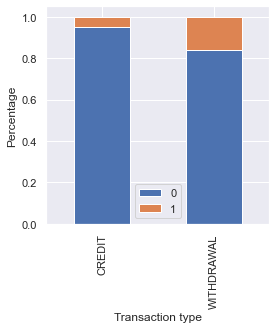

In [70]:
print(pd.crosstab(model_df['LOAN'], model_df['type_most']))

type_most= pd.crosstab( model_df['type_most'], model_df['LOAN'])
type_most.div(type_most.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Transaction type')
plt.legend(loc= 'best')
p = plt.ylabel('Percentage')

The customers who has their most transaction type by WITHDRAWAL, have high probability to get a loan compare to those customers who have their most transaction type by CREDIT.

operation_most  COLLECTION_FROM_OTHER_BANK  CREDIT_IN_CASH  \
LOAN                                                         
0                                        5             123   
1                                        0               4   

operation_most  REMITTANCE_TO_OTHER_BANK  WITHDRAWAL_IN_CASH  
LOAN                                                          
0                                    417                3273  
1                                    118                 560  


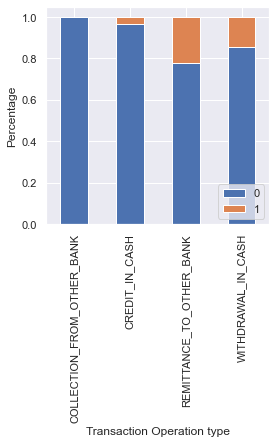

In [71]:
print(pd.crosstab(model_df['LOAN'], model_df['operation_most']))

type_most= pd.crosstab( model_df['operation_most'], model_df['LOAN'])
type_most.div(type_most.sum(1).astype(float), axis= 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Transaction Operation type')
plt.legend(loc= 'lower right')
p = plt.ylabel('Percentage')

In [72]:
list_columns= model_df.select_dtypes(include='O').columns
d= {}
for col in list_columns:
    value= len(model_df[col].value_counts().index)
    d[col]= value

# Create dataframe from dic and make keys, index in dataframe
value_count_df = pd.DataFrame.from_dict(d, orient='index')
value_count_df.rename(columns= {0: 'counts'}, inplace=True)
value_count_df.sort_values(by= 'counts', ascending=False)


,counts
CRIME_95,76
UNEMP_95,71
operation_most,4
GENDER,2
SET_SPLIT,2
type_most,2


## Columns preprocess

In [40]:
# Convert gender from F, M to 0,1
model_df['GENDER'].replace({'F':0, 'M':1}, inplace = True)
model_df['DISTRICT_ID']= model_df['DISTRICT_ID'].astype('str')
model_df['UNEMP_95'] = model_df['UNEMP_95'].replace('?', np.nan).astype(float)
model_df['CRIME_95']= model_df['CRIME_95'].replace('?', np.nan).astype(float) 

In [41]:
# Train-Test split

train= model_df.loc[model_df.SET_SPLIT== 'TRAIN']
test= model_df.loc[model_df.SET_SPLIT== 'TEST']



In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3601 entries, 0 to 4499
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CLIENT_ID       3601 non-null   int64         
 1   ACCOUNT_ID      3601 non-null   int64         
 2   GENDER          3601 non-null   int64         
 3   BIRTH_DT        3601 non-null   datetime64[ns]
 4   Age             3601 non-null   int64         
 5   ACTIVE          3601 non-null   int64         
 6   LOAN            3601 non-null   int64         
 7   DISTRICT_ID     3601 non-null   object        
 8   SET_SPLIT       3601 non-null   object        
 9   N_INHAB         3601 non-null   int64         
 10  N_CITIES        3601 non-null   int64         
 11  URBAN_RATIO     3601 non-null   float64       
 12  AVG_SALARY      3601 non-null   int64         
 13  UNEMP_95        3558 non-null   float64       
 14  UNEMP_96        3601 non-null   float64       
 15  N_EN

In [43]:
target= 'LOAN'
IDcols = ['CLIENT_ID', 'ACCOUNT_ID', 'DISTRICT_ID']
deleted_cols= ['BIRTH_DT','SET_SPLIT', 'max_date', 'min_date']

# variables to use for modelling
predictors = [x for x in train.columns if x not in target and  x not in IDcols and  x not in deleted_cols]

In [44]:
predictors

['GENDER',
 'Age',
 'ACTIVE',
 'N_INHAB',
 'N_CITIES',
 'URBAN_RATIO',
 'AVG_SALARY',
 'UNEMP_95',
 'UNEMP_96',
 'N_ENTR',
 'CRIME_95',
 'CRIME_96',
 'unique_dates',
 'num_days',
 'trans_amount',
 'avg_balance',
 'type_most',
 'operation_most']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# drop "LOAN" and assign it to target variable
X = train[predictors]
y = train[target]

X['operation_most'] = np.where((X.operation_most =='COLLECTION_FROM_OTHER_BANK') | (X.operation_most== 'CREDIT_IN_CASH'),
                              'OTHERS', X.operation_most )

# adding dummies to the dataset
X = pd.get_dummies(X)


# Model Development and Evaluation

# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=123,stratify= y)

# take a look at the dimension of the data
print(x_train.shape, x_cv.shape, y_train.shape, y_cv.shape)


(2520, 21) (1081, 21) (2520,) (1081,)


# Model Development and Evaluation

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [81]:
# define the pipeline
steps = list()
steps.append(('imputer', SimpleImputer())) # for missing values
steps.append(('scaler', MinMaxScaler()))
steps.append(('lr', LogisticRegression()))

pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % ((scores.mean())*100, (scores.std())*100))

Accuracy: 84.444 (0.990)


In [82]:
# Fit the pipeline on training dataset
pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('lr', LogisticRegression())])

0.8501387604070305
[[897  20]
 [142  22]]


Text(30.5, 0.5, 'True')

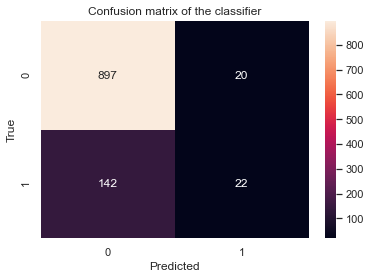

In [83]:
# make prediction
pred_cv = pipeline.predict(x_cv)

# calculate accuracy score
print(accuracy_score(y_cv, pred_cv))

# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [64]:
from joblib import dump, load

# Export the classifier to a file
dump(pipeline, f'{PATH}/models/model_lr.pkl') #, compress = 1


['C:\\Users\\masud.pervez\\Documents\\SEB_project\\seb_project//models/model_lr.pkl']

In [65]:
# To load the model again
clf= joblib.load(f'{PATH}/models/model_lr.joblib')
clf.predict(x_cv)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
# Get the names of each feature
feature_names = pipeline.named_steps["scaler"].get_feature_names()

# Get the coefficients of each feature
coefs = pipeline.named_steps["lr"].coef_.flatten()

# Zip coefficients and names together and make a DataFrame
zipped = zip(feature_names, coefs)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)


import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="feature",
            y="value",
            data=df.head(20),
           palette=df.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

AttributeError: 'MinMaxScaler' object has no attribute 'get_feature_names'

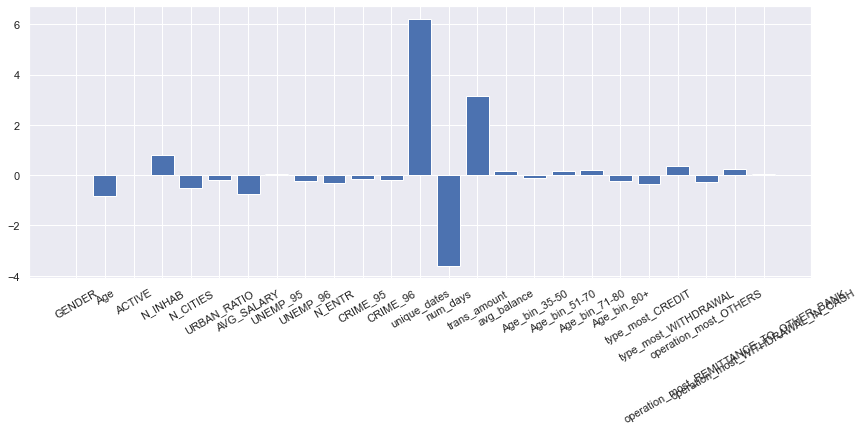

In [85]:
# get importance
importance = pipeline['lr'].coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
plt.figure(figsize=(14,5))
plt.bar([x for x in x_train.columns], importance)
plt.xticks(rotation= 30, horizontalalignment="center")
plt.show()


### RandomForest

In [50]:

# Set up a pipeline with a feature selection preprocessor that
# selects the top 2 features to use.
# The pipeline then uses a RandomForestClassifier to train the model.

pipeline = Pipeline([
      ('imputer', SimpleImputer()),
      ('feature_selection', SelectKBest(chi2, k=10)), # Select Best 10 feature according to chi2;
      ('rf', RandomForestClassifier(n_estimators=50))
    ])

pipeline.fit(x_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()),
                ('feature_selection',
                 SelectKBest(score_func=<function chi2 at 0x00000282AFB93CA0>)),
                ('rf', RandomForestClassifier(n_estimators=50))])

0.8556891766882516
[[898  19]
 [137  27]]


Text(30.5, 0.5, 'True')

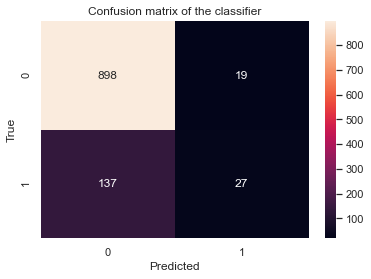

In [51]:
# make prediction
pred_cv = pipeline.predict(x_cv)

# calculate accuracy score
print(accuracy_score(y_cv, pred_cv))

# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [52]:
pipeline.fit(X , y)

pred_train= pipeline.predict(X)
print(accuracy_score(y, pred_train))

X_test= test[predictors]
y_test= test[target]
X_test['operation_most'] = np.where((X_test.operation_most =='COLLECTION_FROM_OTHER_BANK') | (X_test.operation_most== 'CREDIT_IN_CASH'),
                              'OTHERS', X_test.operation_most )

# adding dummies to the dataset
X_test = pd.get_dummies(X_test)
pred_test= pipeline.predict(X_test)
print(accuracy_score(y_test, pred_test))


0.9994445987225771
0.8442714126807565


In [53]:
# import classification_report
from sklearn.metrics import classification_report
print("Model performance on train data\n", classification_report(y, pred_train))
print("Model performance on test data\n", classification_report(y_test, pred_test))


Model performance on train data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3055
           1       1.00      1.00      1.00       546

    accuracy                           1.00      3601
   macro avg       1.00      1.00      1.00      3601
weighted avg       1.00      1.00      1.00      3601

Model performance on test data
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       763
           1       0.44      0.10      0.17       136

    accuracy                           0.84       899
   macro avg       0.65      0.54      0.54       899
weighted avg       0.80      0.84      0.80       899



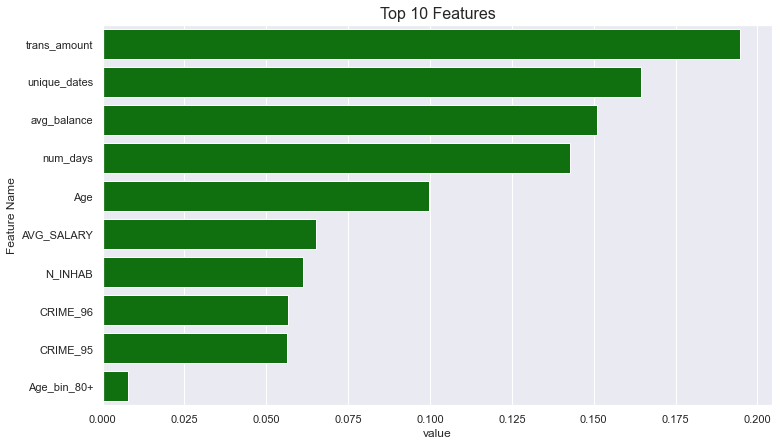

In [94]:
# Zip coefficients and names together and make a DataFrame
mask= mask = pipeline.named_steps["feature_selection"].get_support(indices=True)
feature_names = [j for i,j in enumerate(list(x_train.columns)) if i in mask]

coeff= pipeline.named_steps["rf"].feature_importances_

zipped = zip(feature_names, coeff)
df = pd.DataFrame(zipped, columns=["feature", "value"])
# Sort the features by the absolute value of their coefficient
df["abs_value"] = df["value"].apply(lambda x: abs(x))
df["colors"] = df["value"].apply(lambda x: "green" if x > 0 else "red")
df = df.sort_values("abs_value", ascending=False)


import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="value", y="feature",
            data=df.head(10),
           palette=df.head(10)["colors"])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 10 Features", fontsize=16)
ax.set_xlabel("value", fontsize=12)
ax.set_ylabel("Feature Name", fontsize=12)
plt.show()

In [ ]:

# Export the classifier to a file
joblib.dump(pipeline, 'model_rf.joblib')

## Logistic Regression using stratified k-folds cross-validation

In [442]:
from sklearn.model_selection import StratifiedKFold

In [451]:
# let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))



1 of kfold 5 
accuracy_score 0.8432539682539683
CV accuracy_score 0.8408880666049954

2 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.849213691026827

3 of kfold 5 
accuracy_score 0.8373015873015873
CV accuracy_score 0.8427382053654024

4 of kfold 5 
accuracy_score 0.8571428571428571
CV accuracy_score 0.8436632747456059

5 of kfold 5 
accuracy_score 0.8412698412698413
CV accuracy_score 0.84736355226642

 Mean Validation Accuracy 0.8452380952380952


In [453]:
# Decission tree

# let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.
from sklearn import tree

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))



1 of kfold 5 
accuracy_score 0.7817460317460317
CV accuracy_score 0.7890841813135985

2 of kfold 5 
accuracy_score 0.7876984126984127
CV accuracy_score 0.8048103607770583

3 of kfold 5 
accuracy_score 0.8253968253968254
CV accuracy_score 0.7890841813135985

4 of kfold 5 
accuracy_score 0.7817460317460317
CV accuracy_score 0.7890841813135985

5 of kfold 5 
accuracy_score 0.7936507936507936
CV accuracy_score 0.788159111933395

 Mean Validation Accuracy 0.794047619047619


In [454]:
# Random Forest

# let’s make a cross-validation logistic model with stratified 5 folds and make predictions for the test dataset.
from sklearn.ensemble import RandomForestClassifier

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth= 7)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))



1 of kfold 5 
accuracy_score 0.8492063492063492
CV accuracy_score 0.849213691026827

2 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.849213691026827

3 of kfold 5 
accuracy_score 0.8492063492063492
CV accuracy_score 0.84736355226642

4 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.8482886216466234

5 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.849213691026827

 Mean Validation Accuracy 0.8488095238095237


### Grid Search for hyper parameter tuning

In [456]:
from sklearn.model_selection import GridSearchCV

paramgrid = {"max_depth": list(range(1,10,2)), "n_estimators": list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

# from sklearn.model_selection import train_test_split

# x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

grid_search.best_estimator_
#RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

RandomForestClassifier(max_depth=9, n_estimators=121, random_state=1)

In [466]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=121)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))


1 of kfold 5 
accuracy_score 0.8492063492063492
CV accuracy_score 0.8501387604070305

2 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.849213691026827

3 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.84736355226642

4 of kfold 5 
accuracy_score 0.8511904761904762
CV accuracy_score 0.849213691026827

5 of kfold 5 
accuracy_score 0.8472222222222222
CV accuracy_score 0.849213691026827

 Mean Validation Accuracy 0.85


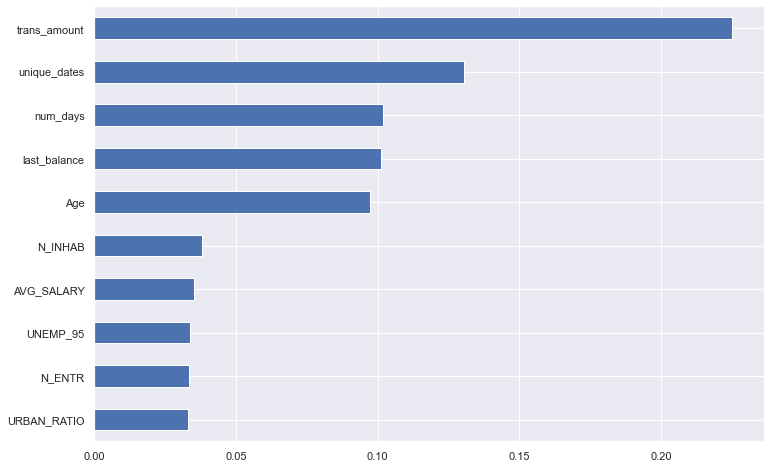

In [467]:
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
ax=feat_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh', figsize=(12,8))
ax.invert_yaxis()
plt.show()


We can see that trans_amount is the most important feature followed by unique_dates. So, feature engineering helped us in predicting our target variable.

In [468]:
# XGBOOST
from xgboost import XGBClassifier

i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
X= x_train.copy()
y= y_train.copy()

for train_index,test_index in kf.split(X,y):
    print ("\n{} of kfold {} ".format(i,kf.n_splits))
    xtr,xvl = X.iloc[train_index], X.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = XGBClassifier(random_state=1, max_depth= 5, n_estimators=500)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ("accuracy_score",score)
    i+=1
    pred_cv = model.predict(x_cv)
    print ("CV accuracy_score",accuracy_score(y_cv,pred_cv))
    pred = model.predict_proba(xvl)[:,1]
    
print("\n Mean Validation Accuracy",mean/(i-1))


1 of kfold 5 
[13:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8472222222222222
CV accuracy_score 0.8307123034227567

2 of kfold 5 
[13:25:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.8551587301587301
CV accuracy_score 0.8279370952821462

3 of kfold 5 
[13:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:lo

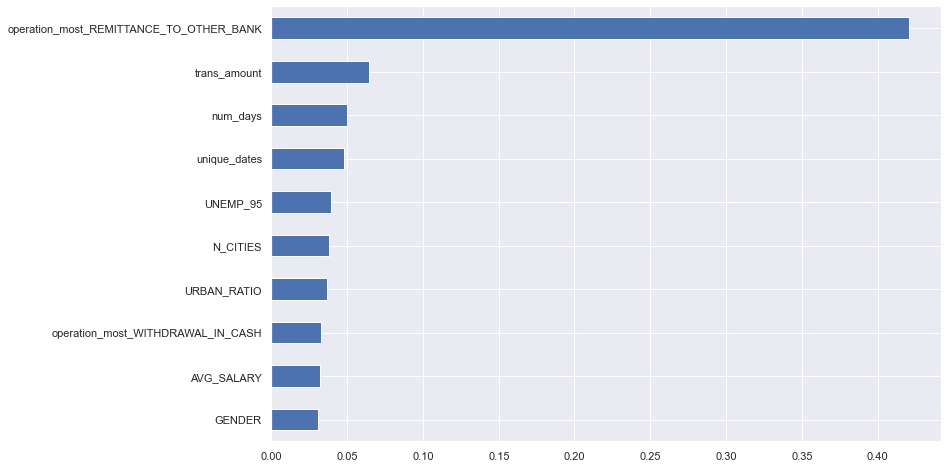

In [469]:
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
ax=feat_importances.sort_values(ascending=False).nlargest(10).plot(kind='barh', figsize=(12,8))
ax.invert_yaxis()
plt.show()

## (C) A/B testing (optional bonus question)

Problem: Finding the optimal channel between email and mobile app to provide loan offer.

How would you select which customers are in the email group or in the mobile app group in the test?

Assume all customers have email address and mobile app. Customers we select for each group are chosen randomly inorder to prevent any selection bias.

Suppose a historic loan campaign conversion rate is 10%, then We might want to increase that to 15% as an example.

Here is the hypothesis to test during the test:

$H_{0}:$ The loan conversion rate is the same for the groups email and mobile app. 

$H_{1}:$ The loan conversion rate is different among the groups email and mobile app.

In [8]:
import statsmodels.stats.proportion as proportion

In [9]:
import statsmodels.stats.proportion as proportion
import numpy as np
converted = np.array([486, 527])
clicks = np.array([5000, 5000])
chisq, pvalue, table = proportion.proportions_chisquare(converted, clicks)
print('chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))
print("Contingency Table:")
print(table)

chisq =1.846, pvalue = 0.174
Contingency Table:
(array([[ 486, 4514],
       [ 527, 4473]]), array([[ 506.5, 4493.5],
       [ 506.5, 4493.5]]))


In [13]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([486, 527])
nobs = np.array([5000, 5000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.174


In [97]:
from statsmodels.stats.proportion import proportions_ztest


def compare_two_groups(array_1, array_2, alpha):
    count = array_1
    n_samples = array_2
    
    zscore, p_value =proportions_ztest(count, n_samples, alternative='two-sided')
    print('Statistics= %.3f , pvalue= %.3f' % (zscore, p_value))
    if p_value > alpha:
        print("Same distributions (fail to reject H0)")
    else: 
        print("Different distributions (reject H0)")

In [99]:
count = np.array([486, 527])
n_samples = np.array([5000, 5000])

compare_two_groups(count, n_samples, alpha=0.05)

Statistics= -1.359 , pvalue= 0.174
Same distributions (fail to reject H0)


Sample size via point estimate, Z test with Test Case
Use case: Calculate sample size based on conversion rate (CVR)
Given: Baseline Conversion Rate=10%, 10% lift on CVR with significant level=95% and power=80%

In [100]:
import statsmodels.stats.api as sms
baseline_cvr=0.1
alpha=0.05
power=0.8
mini_diff=0.1*baseline_cvr
effect_size=sms.proportion_effectsize(baseline_cvr, baseline_cvr+mini_diff)
sample_size=sms.NormalIndPower().solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)
print('Required sample size ~ {0:.1f}'.format(sample_size) + ' per group')
#Output:
#Required sample size ~ 14744.1 per group

Required sample size ~ 14744.1 per group
